# Example of the use case of a linear regression

In [1]:
# Imports

import numpy as np
import arviz as az
import matplotlib.pyplot as plt
from PyBH.pymc_models import LinearRegression
import xarray as xr

In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
# True parameter values
alpha, sigma = 1, 0.5
beta = [1, 2.5, 0.5, 4]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size) * 0.5
X2 = np.random.randn(size) + 5
X3 = np.exp(np.random.randn(size)) +10
X4 = np.cos(np.random.randn(size))

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + beta[2] * X3 + beta[3] * X4 + rng.normal(size=size) * sigma

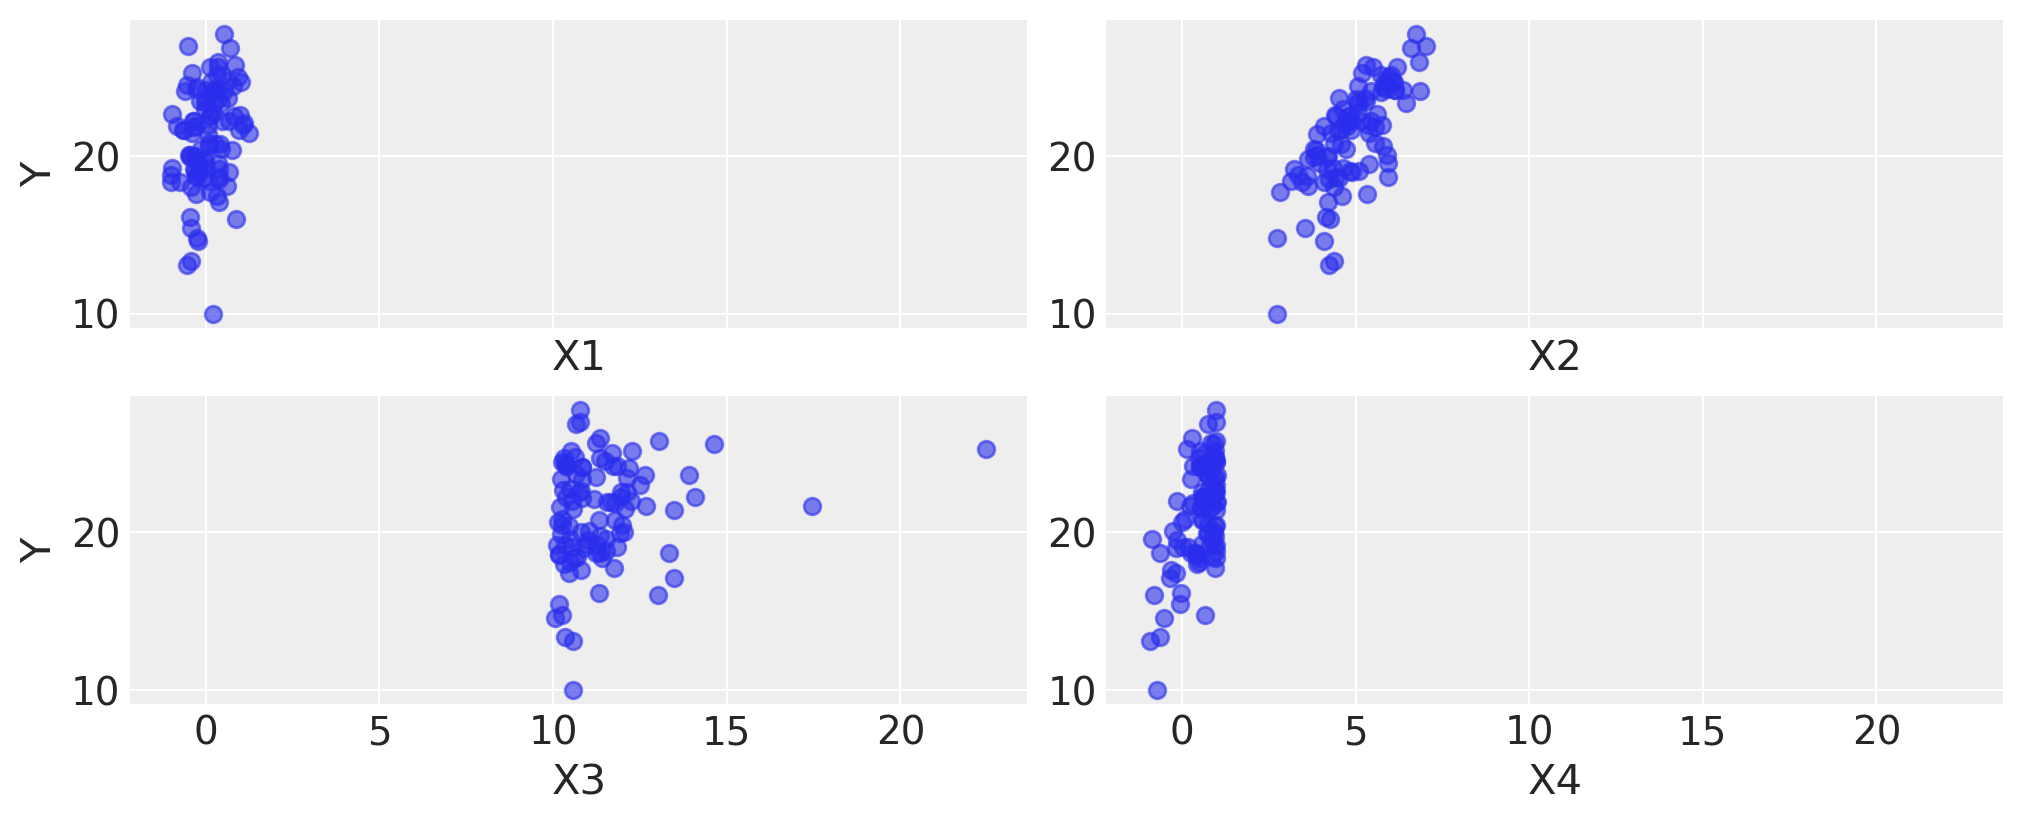

In [4]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10, 4))

axes[0,0].scatter(X1, Y, alpha=0.6)
axes[0,0].set_xlabel("X1")
axes[0,0].set_ylabel("Y")

axes[0,1].scatter(X2, Y, alpha=0.6)
axes[0,1].set_xlabel("X2")

axes[1,0].scatter(X3, Y, alpha=0.6)
axes[1,0].set_xlabel("X3")
axes[1,0].set_ylabel("Y")

axes[1,1].scatter(X4, Y, alpha=0.6)
axes[1,1].set_xlabel("X4");

In [5]:
# Combine les features
X = np.column_stack((X1, X2, X3, X4))

# Création des coordonnées cohérentes avec les dims
coords = {
    "obs_ind": np.arange(X.shape[0]),
    "feature": ["X1", "X2", "X3", "X4"],
}

# Crée les DataArray avec des noms de dims explicites
X_da = xr.DataArray(X, dims=("obs_ind", "feature"), coords=coords)
Y_da = xr.DataArray(Y[:,None], dims=("obs_ind", "treated_units"), coords={"obs_ind": coords["obs_ind"]})

# Création du modèle (pas besoin de coords)
model = LinearRegression()

# Fit
model.fit(X_da, Y_da, coords);

c:\Users\jeanv\miniconda3\envs\PyBH\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


c:\Users\jeanv\miniconda3\envs\PyBH\Lib\site-packages\rich\live.py:256: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]


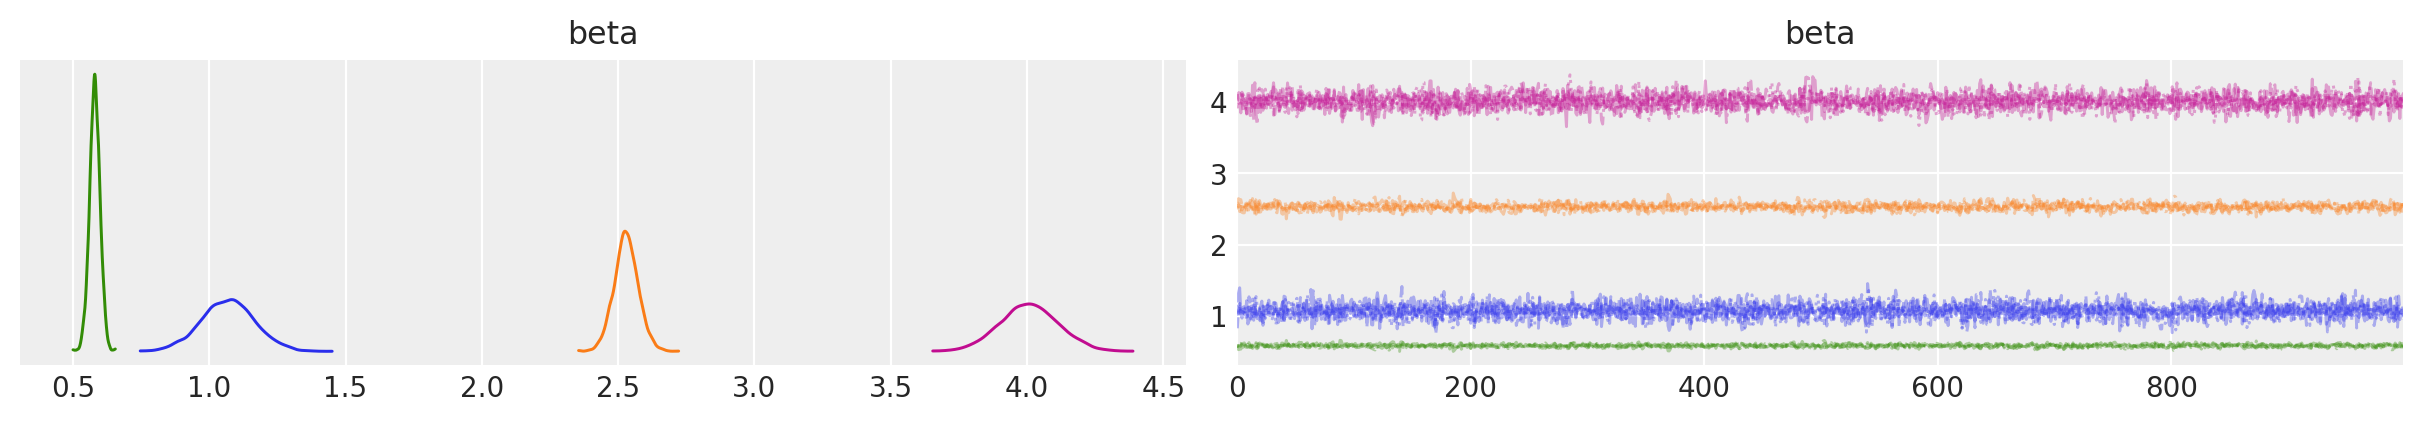

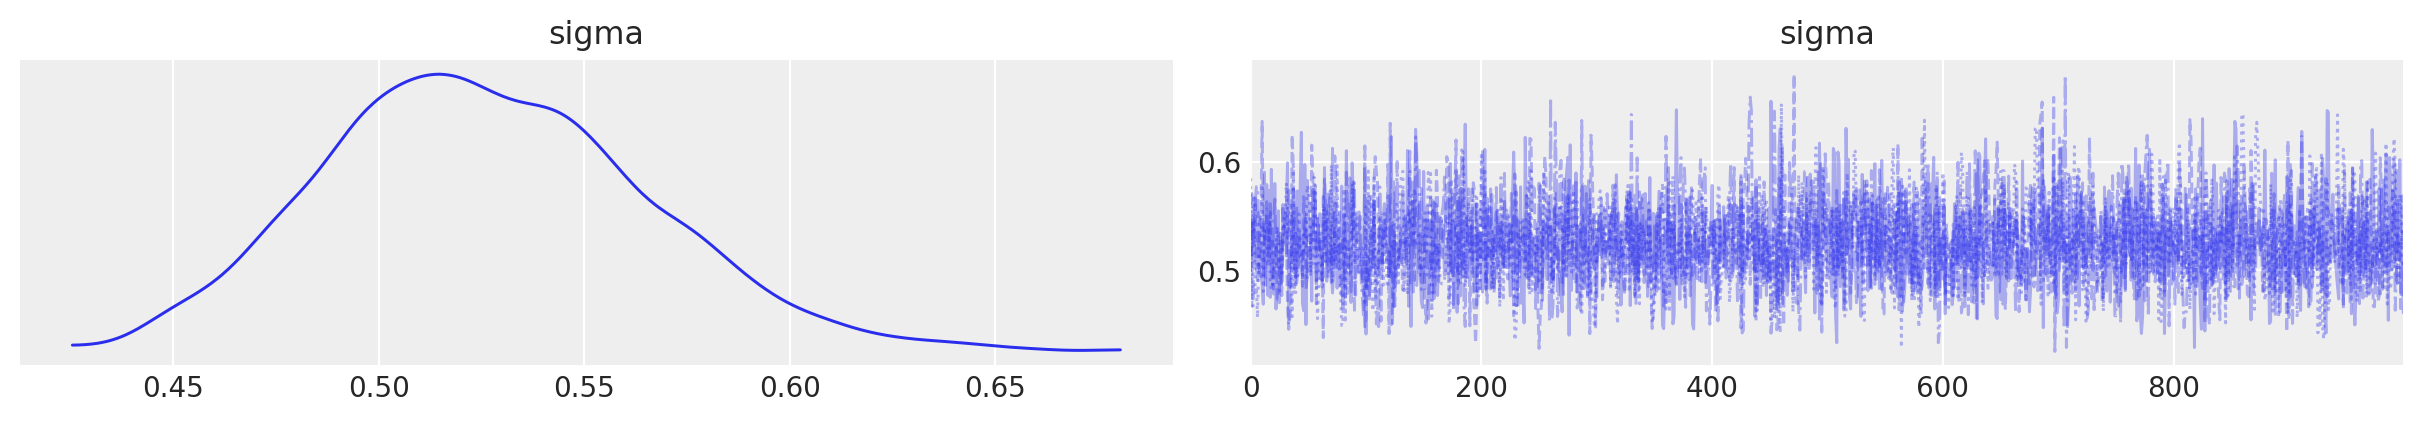

In [7]:
az.plot_trace(model.idata.posterior["beta"], combined=True);
az.plot_trace(model.idata.posterior["sigma"], combined=True);